## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
sum(df.nunique())

585068

In [3]:
sum(df['user_id'].value_counts())

294478

In [36]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [37]:
print(len(df[df['converted']== 1]))
print(df.shape[0])

35237
294478


In [4]:
(len(df[df['converted']== 1]))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [3]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [6]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There are no missing values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [5]:
df2 = (df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) ==True])
df2.shape

(290585, 5)

In [6]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [7]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [8]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [7]:
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [7]:
# drop the duplicated row
df2 = df2.drop_duplicates(subset='user_id')

In [8]:
# to confirm that the duplicated row has been dropped
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [12]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [49]:
(df2.query('group == \"control\"')['converted']==1).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [50]:
(df2.query('group == \"treatment\"')['converted']==1).mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [92]:
New_page_p =(df2.query('landing_page == "new_page"')['user_id'].nunique())


In [93]:
New_page_p/df.shape[0]

0.4934494257635545

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**The probablilty of conversion given the new page is only 12% while that of the control(old page) is 12%. there is no difference between the conversion rates hence there is lack of evidence that the new page leads to more conversions.** 

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test
`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis: the conversion rates for old page group and new page group are equal.** 

**H_0: P_new = P_old**

**Alternative hypothesis: the conversion rate for the group in the new page is greater than that for those who view the old page**

**H_1: P_new > P_old**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [7]:
Pnew_null = df2.converted.mean()
Pnew_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [8]:
Pold_null = df2.converted.mean()
Pold_null

0.11959708724499628

c. What is $n_{new}$?

In [9]:
N_new = df2.query("landing_page == \'new_page\'")['user_id'].nunique()
N_new

145310

d. What is $n_{old}$?

In [10]:
N_old = df2.query("landing_page == \'old_page\'")['user_id'].nunique()
N_old

145274

In [13]:
# difference
Pnew_null - Pold_null

0.0

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [11]:
new_page_converted = np.random.binomial(N_new, Pnew_null)


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [12]:
old_page_converted = np.random.binomial(N_old, Pold_null)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [13]:
P_new = new_page_converted/N_new
P_new

0.12121670910467276

In [14]:
P_old = old_page_converted/N_old
P_old

0.11752963365777772

In [15]:
diff = P_new - P_old
diff

0.0036870754468950467

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [18]:
#sampling distribution for difference in P_new vs P_old
from datetime import datetime
import datetime
start = datetime.datetime.now()
new_page_simulated  = np.random.binomial(N_new, Pnew_null, 10000)/N_new
old_page_simulated = np.random.binomial(N_old, Pold_null, 10000)/N_old 
p_diffs = new_page_simulated - old_page_simulated
end = datetime.datetime.now()
print("it took {} microseconds".format((end-start).microseconds))

it took 2402 microseconds


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [19]:
# convert to numpy array
p_diffs = np.array(p_diffs)


(array([    5.,    51.,   341.,  1261.,  2605.,  3021.,  1865.,   704.,
          131.,    16.]),
 array([-0.00490952, -0.00396796, -0.0030264 , -0.00208484, -0.00114328,
        -0.00020172,  0.00073984,  0.0016814 ,  0.00262296,  0.00356452,
         0.00450608]),
 <a list of 10 Patch objects>)

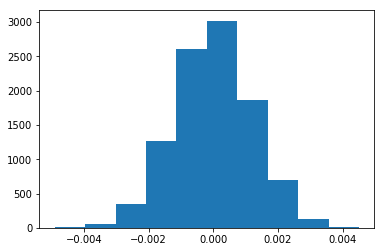

In [20]:
# plot distribution
plt.hist(p_diffs)

**histogram of the difference in distributions.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [21]:
# total number of those that converted after viewing the new page
New_page_convert = df2.query('landing_page == \"new_page\" and converted ==1')['user_id'].nunique()
New_page_convert

17264

In [22]:
# proportion of those that converted after viewing the new page
convert_new = New_page_convert/N_new
convert_new

0.11880806551510564

In [23]:
# those that converted after viewing the old page
Old_page_convert = df2.query('landing_page == \"old_page\" and converted ==1')['user_id'].nunique()
Old_page_convert

17489

In [24]:
# proportion of those that converted after viewing the old page
convert_old = Old_page_convert/N_old
convert_old

0.1203863045004612

In [25]:
#difference in conversion rates
Actual_diff = convert_new - convert_old

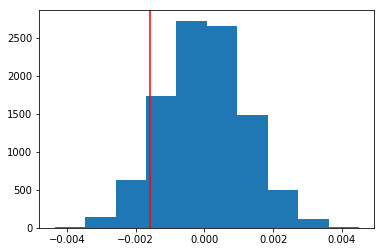

In [26]:
# histogram of the differences
np.std(p_diffs)
null_vals = np.random.normal(0, np.std(p_diffs), 10000)
plt.hist(null_vals)
plt.axvline(x=Actual_diff, color = 'r')

**histogram of the difference in distributions under the null.**

In [43]:
(null_vals > Actual_diff).mean()

0.9052

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In j we computed the p-value in this case which is the probability of observing your statistic if the null hypothesis is true.  since the pvalue of 0.9052 is greater than alpha of 0.05 significance level, there is not enough evidence to reject the null hypothesis that states that there is no difference between the conversion rate for the old page and the new page in favor of the alternative.**

**The practical significance is since there is no difference between the conversion rates for new page and old page, the e-commerce business should either keep the old page or run the experiment longer before analyzing the data.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [9]:
import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [10]:

z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

In [33]:
from scipy.stats import norm

norm.cdf(z_score)
 # Tells us how significant our z-score is


0.90505831275902449

In [28]:
norm.ppf(1-(0.05/2))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.959963984540054

**The z - score is 1.31. since this is a two tail test and the 1.31 is between the critical values of -1.96 and 1.96, we fail to reject the null hypothesis but this is not significant since the p-value is 0.905 at a significant level of 0.05.**

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The null hypothesis states that the conversion rates between the new and old pages is equal while the alternative states that the new page conversion rate is greater than the old page conversion rate. With a p-value of 0.905 at 5% significance level, there is not enough evidence to reject the null hypothesis that the conversion rates are equal.**

**The practical significance is the same as previously stated: since there is no difference between the conversion rates for new page and old page, the e-commerce business should either keep the old page or run the experiment longer before analyzing the data.**

**The z-score is 1.31 and the p-value is 0.905. this is the same p-value found in part j.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [19]:
import statsmodels.api as sm;

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [20]:
dummies = pd.get_dummies(df['landing_page'])
df2 = df2.join(dummies)

In [21]:

df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [22]:
df2['intercept'] = 1
lo=sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lo.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        04:03:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br> 

**In this case, the null hypothesis states that the intercept is equal to 0 while the alternative states that it is not equal to 0.**

**The p-value associated with ab_page is 0.190. The p-value of 0.19 is greater than the significance level of 0.05 which means there is no enough evidence to reject the null hypothesis. failure to reject the nul indicates that there is no relationship between the outcome and the variable. Thus ab_page is not a good predictor of the outcome.**

**Receiving either the new page or old page has no significance impact on whether a customer converts or not. the e-commerce business perhaps needs to rethink the format or the information they provide on the new page in order to improve conversion rates or just keep the old page.**

**The p-values are different because they are testing different hypotheses. In part II we were only concerned about the higher value(probability of conversion) hence a one tailed test. In part iii the test assumes that the parameter for the intercept of the slope is equal to 0 in the null hypothesis while the alternative hypothesis states that the intercept is not equal to 0. Thus it is not concerned about negative or positive extremes but to test if the variable is useful for predicting the response, in essence its a two-tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are more than one factors that can influence one to convert. the treatment alone is not enough to predict whether one converts or not. There is also the likelihood of some variables that affect some individuals differently from others. these variables should be included in the model to make is a stronger fit in predicting the outcome.**

**One disadvantage of adding too many variables is multicollineality whereby some independent variables may be related to one another which has an effect on the outcome and can mess up with the results.** 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [23]:
# load the dataset
df_count = pd.read_csv('countries.csv')
df_count.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [24]:
# merge the 2 datasets
new_df = df2.merge(df_count, on ='user_id', how ='left')
new_df.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US


In [25]:
# creating dummy variables for the column 'country'
new_df[['CA', 'UK', 'US']] = pd.get_dummies(new_df['country'])


In [26]:
# first 5 rows
new_df.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US,0,0,1


In [28]:
# fitting the logistic regression model
new_df['intercept'] = 1
lo=sm.Logit(new_df['converted'], new_df[['intercept','ab_page', 'UK', 'US']])
results = lo.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Aug 2018   Pseudo R-squ.:               2.323e-05
Time:                        04:03:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [29]:
# exponentiate the results
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [39]:
1/_

intercept    7.614303
ab_page      1.015056
UK           0.950621
US           0.960062
dtype: float64

##### interpreting results

**The null hypothesis states that the intercept is equal to 0 while the alternative states that it is not equal to 0.**

**1. an individual that lives in the UK is 1.05 more times likely to convert than one that lives in CA, holding all other variables constant.**

**2. An individual that lives in the US is 1.05 times more likely to convert than one who lives in CA, holding all other variables constant.**

**The null hypothesis states that the country the customer is has no impact on conversion rates while the alternitec hypotheis is that country has an impact on conversion rates.**

**With the model above, after adding the country, all the p-values are not statistically significant either at 0.05 level. Hence there is no enough evidence to reject the null hypothesis - the variables are not good predictors of the outcome.**

**Whether a customer is in the UK or in the US has no influence on the conversion rates.** 


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [30]:
# creating the new columns (interaction between page and country)
new_df['new_UK_page'] = new_df['new_page']*new_df['UK']
new_df['new_US_page'] = new_df['new_page']*new_df['US']
new_df.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country,CA,UK,US,new_UK_page,new_US_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US,0,0,1,0,0


In [31]:
# fitting a new regression model
new_df['intercept'] = 1
lo=sm.Logit(new_df['converted'], new_df[['intercept','new_page', 'UK', 'US', 'new_UK_page', 'new_US_page']])
results1 = lo.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Aug 2018   Pseudo R-squ.:               3.482e-05
Time:                        04:03:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
new_UK_page     0.0783      0.057      1.378      0.168      -0.033       0.190
new_US_page     0.0469      0.054      0.872      0.383      -0.059       0.152
===============================================================================
"""

In [32]:
# exponentiating the results 
np.exp(results1.params)

intercept      0.134794
new_page       0.934776
UK             1.011854
US             1.017682
new_UK_page    1.081428
new_US_page    1.048001
dtype: float64

##### interpreting results

**The null hypothesis states that the intercept is equal to 0 while the alternative states that it is not equal to 0.**

**1. An individual that lives in the US and sees the new page is 1.04 times more likely to convert than one who lives in CA, holding all other variables constant.**

**2. An individual that lives in the UK and sees the new page is is 1.08 times more likely to convert than one who lives in CA, holding all other variables constant.**


**After adding the interactions between country and the new page, the p-values are all greater than 0.05 hence we fail to reject the null hypothesis so the internaction between the country and the new page has no impact on conversion rates - the variables are not good predictors of the outcome.**

**There maybe other variables that influence the conversion rates but from teh model above, the interaction between where a customer comes from and wheter he sees the new page does not really imporive teh conversion rate. It seems that the e-commerce business needs to reevaluate its expereiment and determine other variables that would imporove the conversion rates. Anotehr alternative would be to keep the old page or run the experminent longer.**

## Model Diagnostics

In [33]:
# import necessary packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

new_df.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country,CA,UK,US,new_UK_page,new_US_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US,0,0,1,0,0


In [34]:

X = new_df[['new_page','new_UK_page','new_US_page','US', 'UK']]
y= new_df['converted']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [35]:
log_mod = LogisticRegression()   #fit(on train)
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)  #predict
confusion_matrix(y_test,preds)

array([[51156,     0],
       [ 6961,     0]])

given the confusion matrix above, it shows that our model was not able to predict any true positives or false positives

In [46]:
precision_score(y_test, preds)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [47]:
recall_score(y_test, preds)

0.0

In [48]:
accuracy_score(y_test,preds)

0.88022437496773753

**Given the precision and recall scores of 0, this model is not a good fit to predict whether people convert or not. The experiment needs more time before it can be used to predict the outcome.**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])